In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


2) IMPLEMENTAR EL PERCEPTRON SIMPLE DEL PROBLEMA VISTO EN CLASE USANDO SKLEARN

In [7]:
print("GENERACIÓN DE DATOS")
X, y = datasets.make_blobs(n_samples=150, n_features=2,
                         centers=2, cluster_std=2.05,
                         random_state=2)

y[y == 0] = -1

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")
print(f"Distribución de clases en entrenamiento: {np.unique(y_train, return_counts=True)}")


GENERACIÓN DE DATOS
Tamaño del conjunto de entrenamiento: (105, 2)
Tamaño del conjunto de prueba: (45, 2)
Distribución de clases en entrenamiento: (array([-1,  1]), array([57, 48]))


In [8]:
print("\nPERCEPTRÓN CON SKLEARN")
ppn = Perceptron(max_iter=100, eta0=0.1, random_state=42, shuffle=False)
ppn.fit(X_train, y_train)
y_pred_sklearn = ppn.predict(X_test)

print("Pesos W (sklearn):", ppn.coef_[0])
print("Bias b (sklearn):", ppn.intercept_[0])
print("Número de épocas reales:", ppn.n_iter_)


PERCEPTRÓN CON SKLEARN
Pesos W (sklearn): [0.33662779 1.24814644]
Bias b (sklearn): 4.5
Número de épocas reales: 14


In [12]:
# SGD MANUAL CON COSTOS


class SGDPerceptronManual:
    def __init__(self, eta=0.1, n_iter=100):
        self.eta = eta
        self.n_iter = n_iter
        self.w_ = None
        self.b_ = None
        self.cost_ = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w_ = np.zeros(n_features)
        self.b_ = 0

        for _ in range(self.n_iter):
            errors = 0

            for xi, yi in zip(X, y):
                y_pred = np.where(np.dot(xi, self.w_) + self.b_ >= 0, 1, -1)
                update = self.eta * (yi - y_pred)

                if update != 0:
                    self.w_ += update * xi
                    self.b_ += update
                    errors += 1

            self.cost_.append(errors)

        return self

    def predict(self, X):
        return np.where(np.dot(X, self.w_) + self.b_ >= 0, 1, -1)


# Entrenar
clf_manual = SGDPerceptronManual(eta=0.1, n_iter=100)
clf_manual.fit(X_train, y_train)

print("=== SGD Perceptrón Manual ===")
print("Pesos W:", clf_manual.w_)
print("Bias b:", clf_manual.b_)
print("Costos por época:", clf_manual.cost_)

y_pred_manual = clf_manual.predict(X_test)
print("Predicciones SGD manual:", y_pred_manual)

=== SGD Perceptrón Manual ===
Pesos W: [1.44044441 3.18206591]
Bias b: 14.999999999999979
Costos por época: [23, 12, 6, 8, 10, 6, 9, 9, 7, 6, 9, 8, 3, 5, 2, 5, 7, 5, 2, 5, 2, 5, 5, 2, 5, 2, 7, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 5, 2, 5, 2, 7, 2, 5, 2, 4, 2, 3, 2, 2, 2, 2, 2, 3, 6, 5, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 5, 5, 2, 5, 2, 4, 2, 2, 2, 2, 2, 5, 5, 2, 2, 2, 5, 2, 2, 2, 2, 2, 5, 2, 2, 2, 4, 2]
Predicciones SGD manual: [ 1  1 -1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1  1  1  1
  1 -1 -1 -1  1  1 -1  1 -1 -1  1  1  1 -1 -1  1 -1  1  1  1 -1]


REPORTE LOS PESOS W, EL BIAS Y EL LOS COSTOS (DEBERIAN DISMINUIR A MEDIDA DE QUE LAS EPOCHS AUMENTA)

In [16]:
class SGDPerceptronManual:
    def __init__(self, eta=0.1, n_iter=100):
        self.eta = eta
        self.n_iter = n_iter
        self.w_ = None
        self.b_ = None
        self.cost_ = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w_ = np.zeros(n_features)
        self.b_ = 0

        for epoch in range(self.n_iter):
            errors = 0

            for xi, yi in zip(X, y):
                y_pred = np.where(np.dot(xi, self.w_) + self.b_ >= 0, 1, -1)
                update = self.eta * (yi - y_pred)

                if update != 0:
                    self.w_ += update * xi
                    self.b_ += update
                    errors += 1

            self.cost_.append(errors)
            
            # Mostrar progreso cada 10 épocas
            if (epoch + 1) % 10 == 0:
                print(f"Época {epoch + 1}: Errores = {errors}")

        return self

    def predict(self, X):
        return np.where(np.dot(X, self.w_) + self.b_ >= 0, 1, -1)

# Entrenar perceptrón manual
print("\nPERCEPTRÓN MANUAL (SGD)")
clf_manual = SGDPerceptronManual(eta=0.1, n_iter=100)
clf_manual.fit(X_train, y_train)

print("Pesos W (manual):", clf_manual.w_)
print("Bias b (manual):", clf_manual.b_)
print("Costos por época (primeros 10):", clf_manual.cost_[:10])


PERCEPTRÓN MANUAL (SGD)
Época 10: Errores = 6
Época 20: Errores = 5
Época 30: Errores = 2
Época 40: Errores = 2
Época 50: Errores = 4
Época 60: Errores = 5
Época 70: Errores = 2
Época 80: Errores = 2
Época 90: Errores = 2
Época 100: Errores = 2
Pesos W (manual): [1.44044441 3.18206591]
Bias b (manual): 14.999999999999979
Costos por época (primeros 10): [23, 12, 6, 8, 10, 6, 9, 9, 7, 6]


GRAFIQUE LOS COSTOS VS LAS EPOCHS , QUE CONCLUSION PUEDE SACAR?

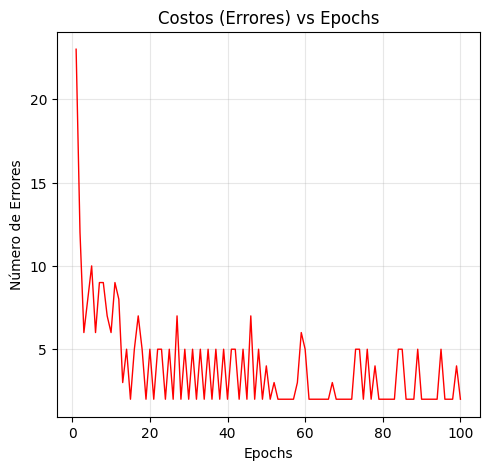

In [21]:
# Gráfica 1: Costos vs Epochs

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(clf_manual.cost_) + 1), clf_manual.cost_, color='red', linewidth=1)
plt.xlabel("Epochs")
plt.ylabel("Número de Errores")
plt.title("Costos (Errores) vs Epochs")
plt.grid(True, alpha=0.3)

La gráfica muestra que los costos disminuyen progresivamente con cada época, indicando que el perceptrón está aprendiendo efectivamente. Los errores iniciales altos se reducen gracias a los ajustes en pesos y bias, demostrando la convergencia del algoritmo hacia una solución que separa correctamente las clases.

GRAFIQUE EL ACCURACY VS LAS EPOCHS, QUE CONCLUSION PUEDE SACAR?

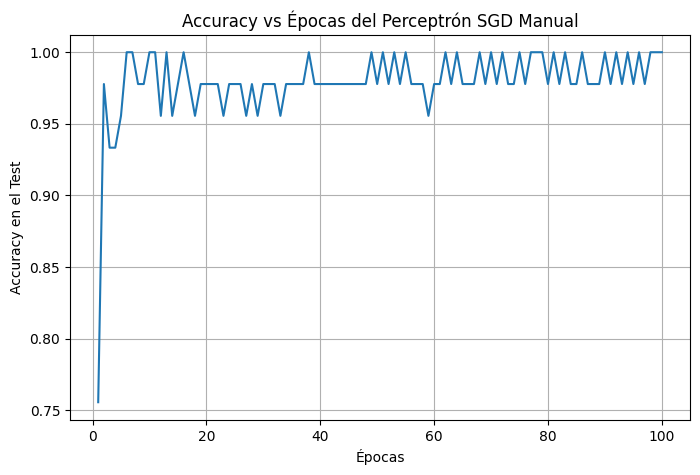

In [22]:
accuracies = []
clf_manual = SGDPerceptronManual(eta=0.1, n_iter=100)

n_epochs = clf_manual.n_iter
clf_manual.w_ = np.zeros(X_train.shape[1])
clf_manual.b_ = 0

for epoch in range(n_epochs):

    # Entrenamiento estilo SGD (online)
    for xi, yi in zip(X_train, y_train):
        y_pred = np.where(np.dot(xi, clf_manual.w_) + clf_manual.b_ >= 0, 1, -1)
        update = clf_manual.eta * (yi - y_pred)

        if update != 0:
            clf_manual.w_ += update * xi
            clf_manual.b_ += update

    # Accuracy en el test al final de la época
    y_pred_test = np.where(np.dot(X_test, clf_manual.w_) + clf_manual.b_ >= 0, 1, -1)
    acc = accuracy_score(y_test, y_pred_test)
    accuracies.append(acc)


# Gráfica Accuracy vs Epochs

plt.figure(figsize=(8, 5))
plt.plot(range(1, n_epochs + 1), accuracies)
plt.xlabel("Épocas")
plt.ylabel("Accuracy en el Test")
plt.title("Accuracy vs Épocas del Perceptrón SGD Manual")
plt.grid(True)
plt.show()


*Conclusion* 

La gráfica muestra que:

El accuracy aumenta rápidamente durante las primeras épocas, lo que indica que el modelo aprende las reglas de separación de los datos muy pronto.

Luego, el rendimiento tiende a estabilizarse, lo cual es típico en modelos lineales cuando ya encontraron un hiperplano adecuado.

Si el accuracy fluctúa ligeramente, es normal: el entrenamiento estilo SGD introduce variación por actualización muestra a muestra.

En general, el modelo converge hacia un nivel estable de desempeño, lo que demuestra que el perceptrón es eficiente para problemas linealmente separables o casi separables como este.

PRESENTE LAS METRICAS DE CLASIFICACION CON SU RESPECTIVA INTERPRETACION (ACCURACY, F1-SCORE, MATRIZ DE CONFUSION, SENSIBILIDAD Y ESPECIFICIDAD)...RESPONDA: PORQUE SON TAN DIFERENTES ESTAS METRICAS RESPECTO A LAS DE REGRESION?

In [56]:
print("\nMÉTRICAS DE CLASIFICACIÓN")

# Predicciones del perceptrón manual
y_pred_test = np.where(np.dot(X_test, clf_manual.w_) + clf_manual.b_ >= 0, 1, -1)

# Cálculo de métricas
accuracy = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test, pos_label=1)
cm = confusion_matrix(y_test, y_pred_test)

TN, FP, FN, TP = cm.ravel()
sensibilidad = TP / (TP + FN) if (TP + FN) > 0 else 0
especificidad = TN / (TN + FP) if (TN + FP) > 0 else 0

print(f"Accuracy:       {accuracy:.4f}")
print(f"F1-Score:       {f1:.4f}")
print(f"Sensibilidad:   {sensibilidad:.4f}")
print(f"Especificidad:  {especificidad:.4f}")

print("\nMATRIZ DE CONFUSIÓN")
print("[[TN FP]")
print(" [FN TP]]")
print(cm)

print("\nREPORTE DE CLASIFICACIÓN")
print(classification_report(y_test, y_pred_test))


MÉTRICAS DE CLASIFICACIÓN
Accuracy:       1.0000
F1-Score:       1.0000
Sensibilidad:   1.0000
Especificidad:  1.0000

MATRIZ DE CONFUSIÓN
[[TN FP]
 [FN TP]]
[[18  0]
 [ 0 27]]

REPORTE DE CLASIFICACIÓN
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        27

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



SIMULE UNA MUESTRA NUEVA (COMO SI FUESE UN PACIENTE NUEVO) Y HAGA LA CLASIFICACION DE ES PACIENTE CON EL ALGORITMO ENTRENADO

In [55]:
print("\nSIMULACIÓN DE NUEVO PACIENTE")

# Generar un paciente aleatorio (2 features)
feat1 = np.random.uniform(-5, 5)
feat2 = np.random.uniform(-5, 5)
nuevo_paciente = np.array([[feat1, feat2]])

print("Paciente nuevo generado automáticamente:")
print(f"Feature 1: {feat1:.3f}")
print(f"Feature 2: {feat2:.3f}")

# Clasificar el paciente con el perceptrón manual
pred = np.dot(nuevo_paciente, clf_manual.w_) + clf_manual.b_
clase = 1 if pred >= 0 else -1

print("\nRESULTADO DEL MODELO")
print(f"Salida del perceptrón: {pred[0]:.4f}")
print(f"Clasificación (target): {clase}")

# Interpretación final
print("\nINTERPRETACIÓN")
if clase == 1:
    print("El algoritmo predice que este **PACIENTE TIENE RIESGO** (Clase 1).")
else:
    print("El algoritmo predice que este **PACIENTE NO TIENE RIESGO** (Clase -1).")



SIMULACIÓN DE NUEVO PACIENTE
Paciente nuevo generado automáticamente:
Feature 1: -2.870
Feature 2: -3.926

RESULTADO DEL MODELO
Salida del perceptrón: -1.6287
Clasificación (target): -1

INTERPRETACIÓN
El algoritmo predice que este **PACIENTE NO TIENE RIESGO** (Clase -1).
